In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
csv = pd.read_csv('US_Accidents_May19.csv')

In [15]:
Xdata = csv.sample(n=500000, random_state=1)

In [16]:
X = np.array([Xdata['Start_Lng'],Xdata['Start_Lat']]).T
y = np.array(Xdata['Severity'])

In [17]:
import math

# Clean NaN Data

for j in range(len(X[0])):
    mean = np.nanmean(X[:, j])
    for i in range(len(X)):
        if (math.isnan(X[i,j])):
            X[i,j] = mean

In [18]:
# 10 Fold Cross Validation - Train on 9 subsets, Validate on 1 subset
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=False) 

# 1
from sklearn import neighbors
for i in range(1,10,2):
    print(i, '- nearest neighbors:')
    for k, (train, test) in enumerate(k_fold.split(X)):
        clf = neighbors.KNeighborsClassifier(i)
        clf.fit(X[train],y[train])
        yPred = clf.predict(X[test])
        print (k, ':\t', (y[test]==yPred).sum() / float(test.size),
            '  =  ', clf.score(X[test],y[test]) )



1 - nearest neighbors:
0 :	 0.81408   =   0.81408
1 :	 0.81598   =   0.81598
2 :	 0.81612   =   0.81612
3 :	 0.8164   =   0.8164
4 :	 0.81518   =   0.81518
5 :	 0.81412   =   0.81412
6 :	 0.81392   =   0.81392
7 :	 0.81664   =   0.81664
8 :	 0.81548   =   0.81548
9 :	 0.81672   =   0.81672
3 - nearest neighbors:
0 :	 0.82772   =   0.82772
1 :	 0.83022   =   0.83022
2 :	 0.8301   =   0.8301
3 :	 0.82686   =   0.82686
4 :	 0.82724   =   0.82724
5 :	 0.82836   =   0.82836
6 :	 0.82724   =   0.82724
7 :	 0.83006   =   0.83006
8 :	 0.82652   =   0.82652
9 :	 0.83094   =   0.83094
5 - nearest neighbors:
0 :	 0.82278   =   0.82278
1 :	 0.82512   =   0.82512
2 :	 0.82472   =   0.82472
3 :	 0.82448   =   0.82448
4 :	 0.82372   =   0.82372
5 :	 0.82634   =   0.82634
6 :	 0.826   =   0.826
7 :	 0.82644   =   0.82644
8 :	 0.8216   =   0.8216
9 :	 0.82562   =   0.82562
7 - nearest neighbors:
0 :	 0.81718   =   0.81718
1 :	 0.82002   =   0.82002
2 :	 0.81958   =   0.81958
3 :	 0.81862   =   0.81862


In [19]:
import matplotlib.patches as mpatches

clf = neighbors.KNeighborsClassifier(3)
clf.fit(X,y)


from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#e0e0e0', '#BBFFBB', '#BBBBFF', '#FFBBBB'])
cmap_bold = ListedColormap(['#808080', '#00AA00', '#0000CC', '#CC0000'])

h = 0.1 # step size in the mesh

# Points in a mesh of [x_min, m_max] x [y_min, y_max]
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = clf.predict(grid)
Z1 = Z1.reshape(xx.shape)

/Users/tonywu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/Users/tonywu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/tonywu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


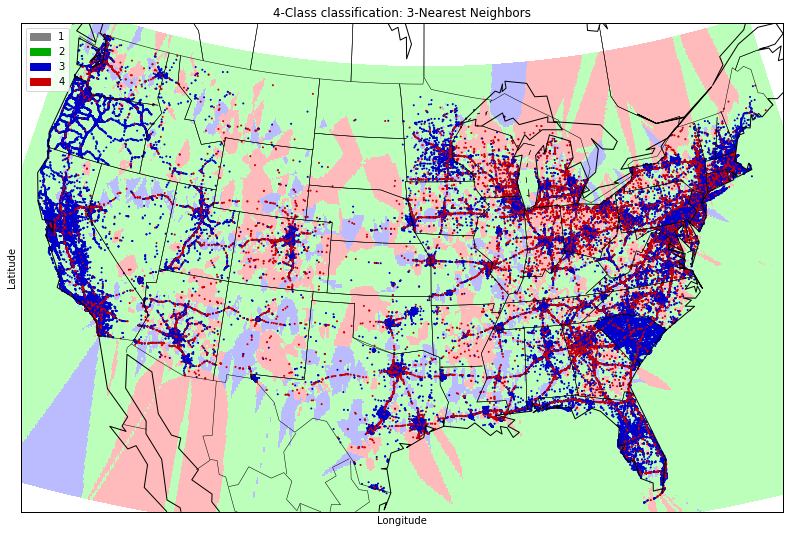

In [21]:
# Plot Stuff
plt.figure(figsize=(15,9))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.xlim(xx1.min(), xx1.max())
# plt.ylim(yy1.min(), yy1.max())
plt.title("4-Class classification: 3-Nearest Neighbors")
red_patch = mpatches.Patch(color='#808080', label='1')
green_patch = mpatches.Patch(color='#00AA00', label='2')
blue_patch = mpatches.Patch(color='#0000CC', label='3')
gray_patch = mpatches.Patch(color='#CC0000', label='4')
plt.legend(handles=[red_patch, green_patch, blue_patch, gray_patch])

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines.
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.drawstates()
m.drawcountries()
# fill continents, set lake color same as ocean color.
m.fillcontinents(alpha = 0, color='blue',lake_color='white')

lons, lats = m(X[:,0], X[:,1])
xx1, yy1 = m(xx, yy)


m.pcolormesh(xx1, yy1, Z1, cmap=cmap_light)
m.scatter(lons, lats, c=y, cmap=cmap_bold, s = 1)


plt.show()

In [22]:
# Clustering

X=Xdata[['Start_Lng','Start_Lat','Severity']]
X=X.to_numpy()

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

k = 20
kmeans = KMeans(n_clusters=k, n_init=100,init='k-means++')
kmeans.fit(X)
center, y = kmeans.cluster_centers_, kmeans.labels_



/Users/tonywu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/Users/tonywu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/tonywu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


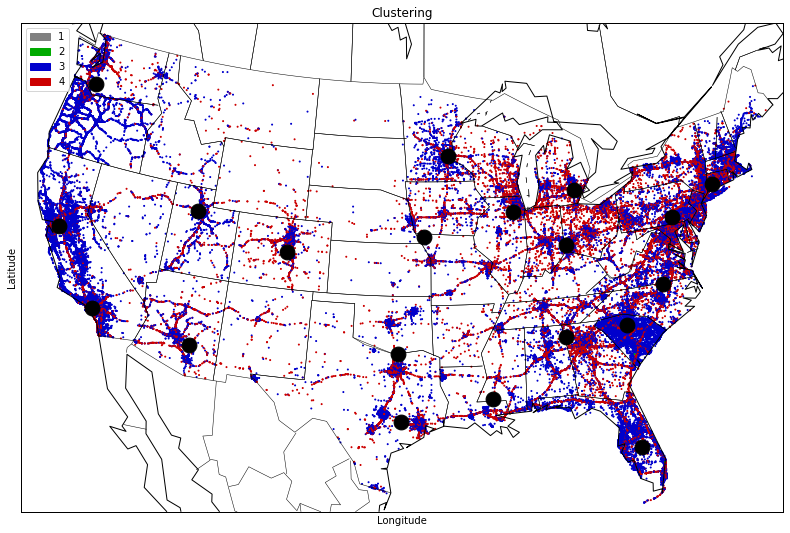

In [24]:
# Plot
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#808080', '#00AA00', '#0000CC', '#CC0000'])
plt.figure(figsize=(15,9))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustering")
red_patch = mpatches.Patch(color='#808080', label='1')
green_patch = mpatches.Patch(color='#00AA00', label='2')
blue_patch = mpatches.Patch(color='#0000CC', label='3')
gray_patch = mpatches.Patch(color='#CC0000', label='4')
plt.legend(handles=[red_patch, green_patch, blue_patch, gray_patch])

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines.
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.drawstates()
m.drawcountries()
# fill continents, set lake color same as ocean color.
m.fillcontinents(alpha = 0, color='blue',lake_color='white')


lons, lats = m(X[:,0], X[:,1])
m.scatter(lons, lats, c=Xdata['Severity'],cmap=cmap_bold,s=1)
center1, center2 = m(center[:,0], center[:,1])
m.scatter(center1,center2,c='k',marker='o',alpha=1, s = 220)


plt.show()


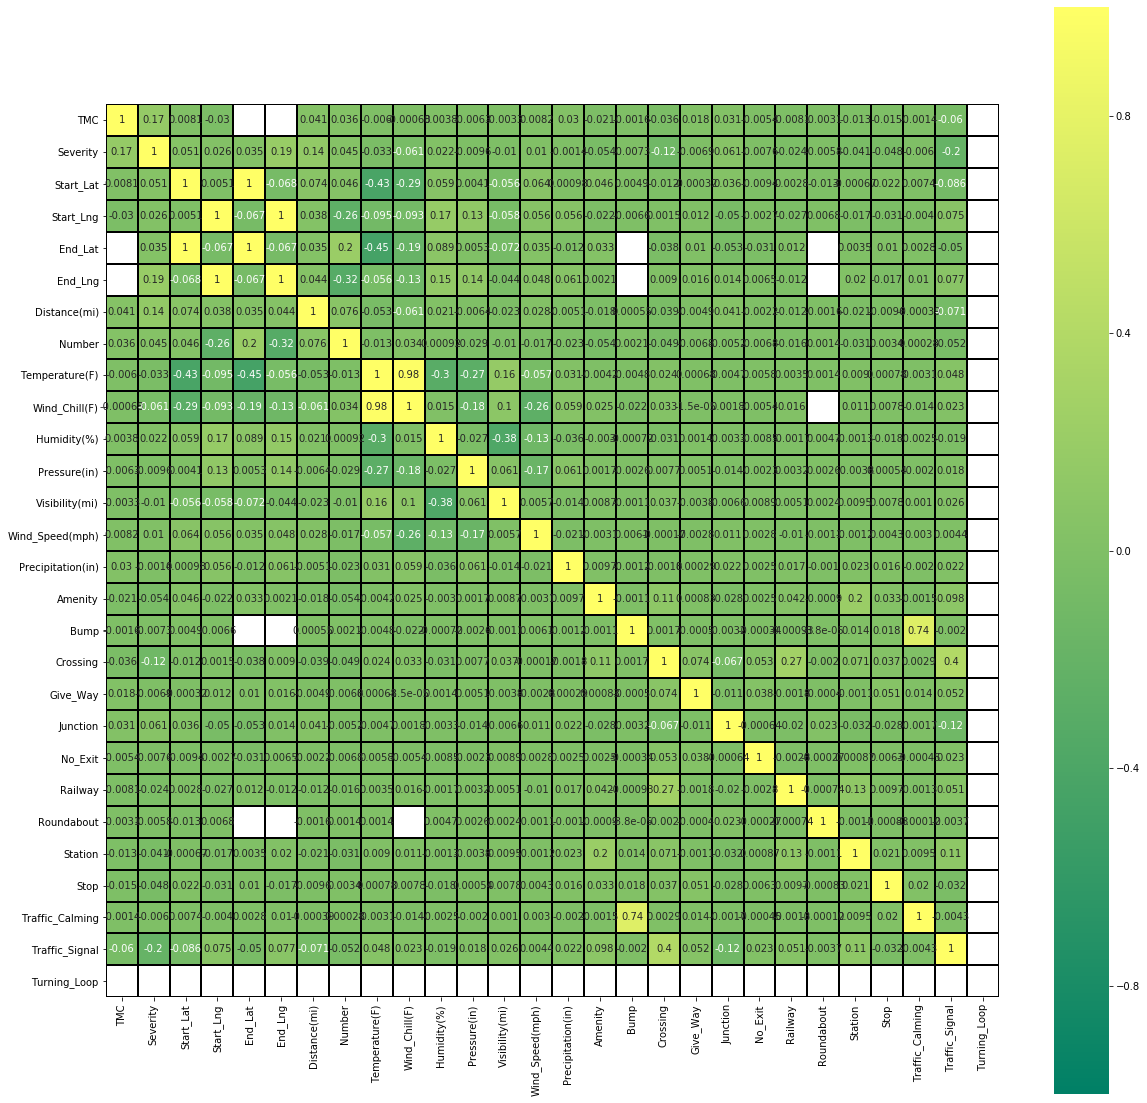

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(Xdata.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno 

df = pd.read_csv('US_Accidents_May19.csv')
data = df.values # numpy array



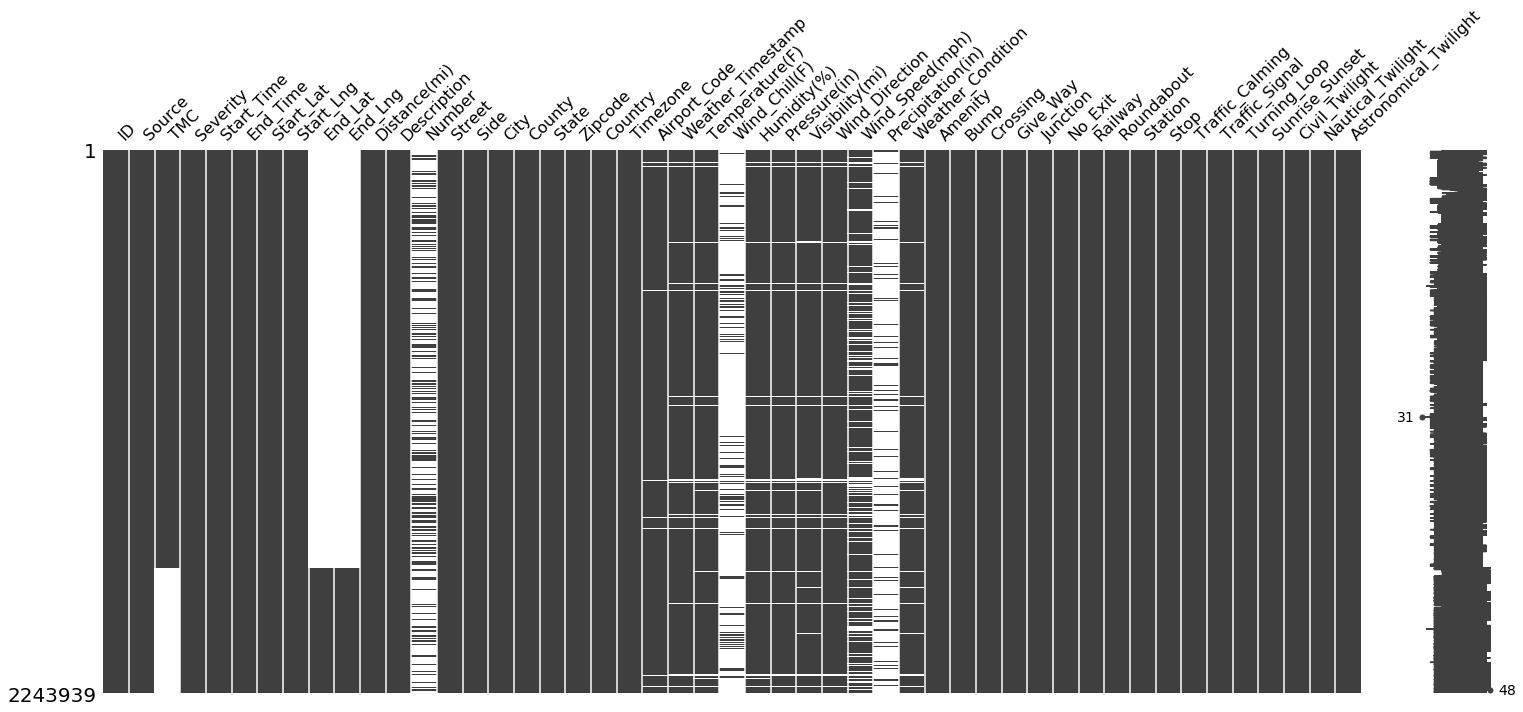

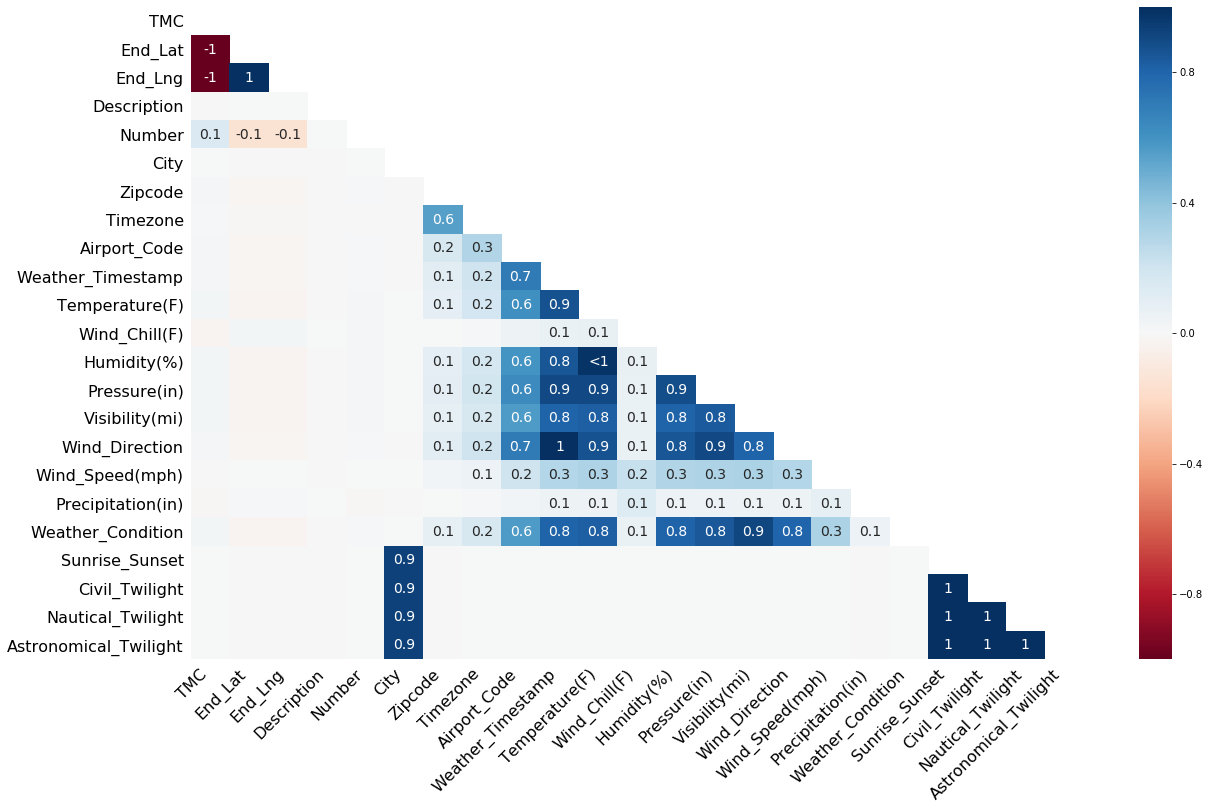

In [67]:
# Visualize missing values as a matrix 
msno.matrix(df) 
msno.heatmap(df) 

In [39]:
df['Sunrise_Sunset'].replace('Day', 0 ,inplace=True)
df['Sunrise_Sunset'].replace('Night', 1 ,inplace=True)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,1.0,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,1.0,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,1.0,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,1.0,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,0.0,Day,Day,Day


In [44]:
df['Traffic_Signal'].replace('True', 1 ,inplace=True)
df['Traffic_Signal'].replace('False', 0 ,inplace=True)

df['Side'].replace('R', 1 ,inplace=True)
df['Side'].replace('L', 0 ,inplace=True)

df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,1.0,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,1.0,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,1.0,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,1.0,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,0.0,Day,Day,Day


In [45]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [46]:
sample = df.sample(100000)

In [249]:
dat = sample[['Severity', 'Start_Lat', 'Start_Lng', 'Start_Time', 'Side','Temperature(F)', 'Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Traffic_Signal', 'Sunrise_Sunset']]
dat = dat.rename(columns = {"Severity":"target"})
dat.dropna(inplace=True)
#dat['label'] = 0.0
print(dat.describe())


             target     Start_Lat     Start_Lng  Temperature(F)   Humidity(%)  \
count  10507.000000  10507.000000  10507.000000    10507.000000  10507.000000   
mean       2.419911     37.835549    -90.864321       53.007424     86.702484   
std        0.552873      5.268262     16.032712       17.996929     11.393829   
min        1.000000     25.477402   -124.422614      -20.900000      9.000000   
25%        2.000000     33.975916    -96.819029       39.900000     82.000000   
50%        2.000000     38.720790    -84.547852       54.000000     89.000000   
75%        3.000000     41.890316    -80.061741       66.900000     94.000000   
max        4.000000     48.963814    -68.644780      100.900000    100.000000   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
count  10507.000000    10507.000000     10507.000000       10507.000000   
mean      29.956810        6.362197         9.755877           0.053323   
std        0.220455        3.497684         5

In [221]:
from sklearn.preprocessing import StandardScaler

In [250]:
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Sunrise_Sunset']
# Separating out the features
x = dat.loc[:, features].values
# Separating out the target
y = dat.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [251]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [252]:
targDf = pd.DataFrame(data = y, columns = ['targ'])
finalDf = pd.concat([principalDf, targDf], axis = 1)

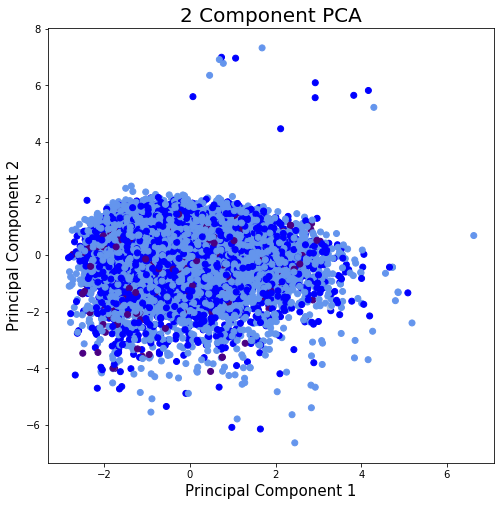

In [259]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

label = finalDf['targ']
colors = ['lightsteelblue', 'cornflowerblue', 'blue', 'indigo']

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=label, cmap=matplotlib.colors.ListedColormap(colors))




In [254]:
pca.explained_variance_ratio_

array([0.22652424, 0.17876145])

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
import pandas as pd


df = pd.read_csv("US_Accidents_May19.csv")

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


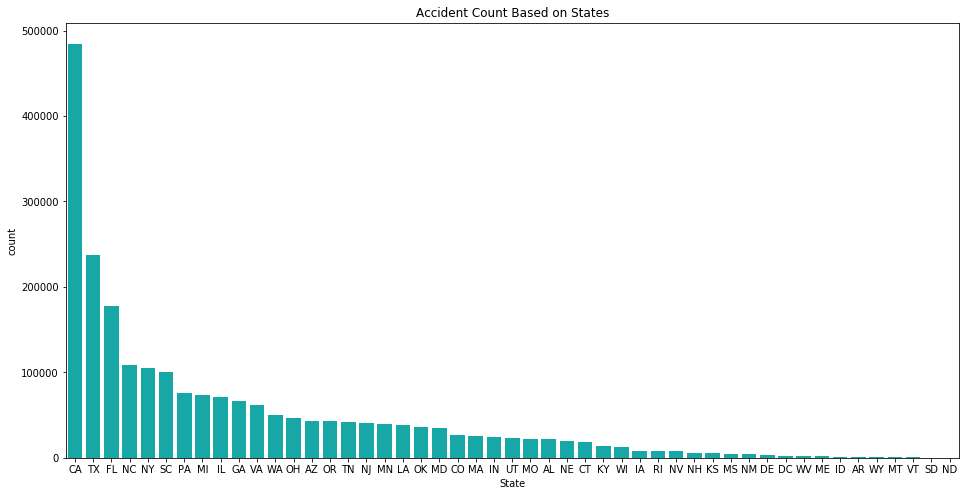

In [26]:
fig,ax=plt.subplots(figsize=(16,8))
sns.countplot('State',data=df,color='c',ax=ax,order=file['State'].value_counts().index)
ax.set_title('Accident Count Based on States')
plt.show()

Text(0, 0.5, 'Latitude')

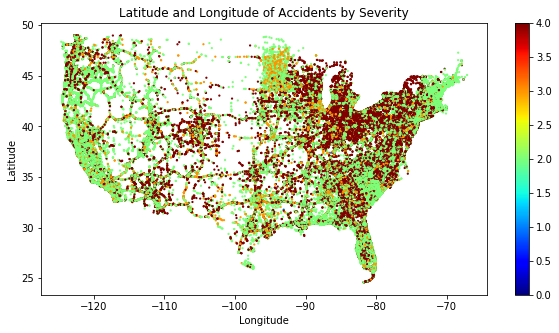

In [28]:
plt.figure(figsize=(10,5))
points = plt.scatter(x = df.Start_Lng, y = df.Start_Lat, c=df.Severity,s=5,cmap="jet", lw=0)
plt.colorbar(points)
plt.title("Latitude and Longitude of Accidents by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")